# Estudo prático - CNN

#### Sabrina Otoni da Silva - 2023

##Classificação de Imagens Reais

Baixe o seguinte arquivo: https://www.dropbox.com/s/sofyakylqodcrd3/Digitos.zip?dl=0

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,AveragePooling2D
from keras.utils import img_to_array , load_img
import numpy as np
from keras import preprocessing

from keras.callbacks import ModelCheckpoint

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/Digitos.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Datasets')

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='training',
    target_size=(30, 30))


Found 5473 images belonging to 10 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='validation',
    target_size=(30, 30))

Found 1363 images belonging to 10 classes.


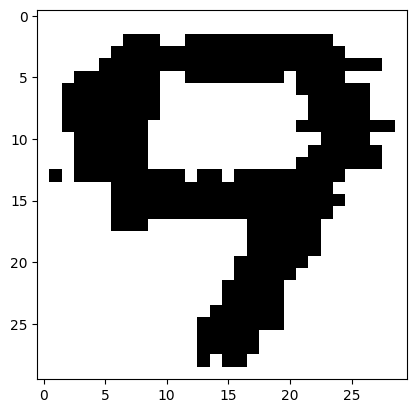

In [ ]:
#Visualizando
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
x.shape

(200, 30, 30, 1)

In [ ]:
image.shape

(30, 30, 1)

In [ ]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
num_classes = 10

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [ ]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros)
model.add(Conv2D(32, (7, 7), input_shape=(30,30,1), activation='relu')) #, data_format='channels_first'
print( model.output_shape)
#Camada de Pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros)
model.add(Conv2D(64, (5, 5), activation='relu'))
print( model.output_shape)
#Camada de Pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 128 kernels/Pesos (filtros)
model.add(Conv2D(128, (3, 3), activation='relu'))
print( model.output_shape)
#Camada de Pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Remove 30% dos dados de entrada aleatoriamente
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)

(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 2, 2, 128)
(None, 1, 1, 128)
(None, 128)
(None, 64)
(None, 64)
(None, 10)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mcp_save = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        1600      
                                                                 
 average_pooling2d (Average  (None, 12, 12, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 1, 1, 128)         0

<ipython-input-14-1b3a6717d059>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


24/27 [=========================>....] - ETA: 0s - loss: 2.2187 - accuracy: 0.4162
Epoch 1: val_accuracy improved from -inf to 0.88083, saving model to model_best.h5
27/27 [==============================] - 16s 81ms/step - loss: 2.0653 - accuracy: 0.4470 - val_loss: 0.4419 - val_accuracy: 0.8808
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8621
Epoch 2: val_accuracy improved from 0.88083 to 0.97583, saving model to model_best.h5
27/27 [==============================] - 2s 78ms/step - loss: 0.4069 - accuracy: 0.8621 - val_loss: 0.0703 - val_accuracy: 0.9758
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.1427 - accuracy: 0.9522
Epoch 3: val_accuracy improved from 0.97583 to 0.99417, saving model to model_best.h5
27/27 [==============================] - 3s 96ms/step - loss: 0.1427 - accuracy: 0.9522 - val_loss: 0.0217 - val_accuracy: 0.9942
Epoch 4/10
26/27 [===========================>..] - ETA: 0s - loss: 0.0876 - accura

In [ ]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Teste',
    batch_size=1,
    color_mode = 'grayscale',
    target_size=(30, 30))

Found 73 images belonging to 10 classes.


In [ ]:
scores = model.evaluate_generator(test_generator)
print(scores)

<ipython-input-16-079ee025880b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


[0.021215468645095825, 1.0]


In [ ]:
predictions = model.predict_generator(test_generator)
print(predictions)

In [ ]:
res1 = np.argmax(predictions[0,:])
print(res1)

8


Como Fazer a predição de uma imagem PNG?

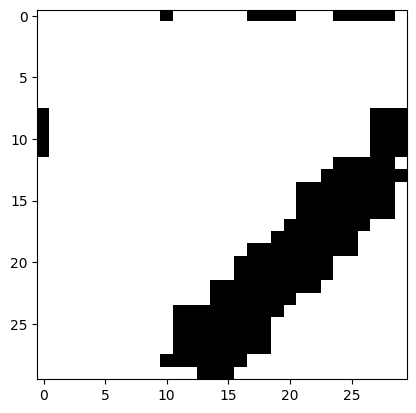

In [ ]:
#fileimg = r'D:\digito_7_2SAN.png'
fileimg = r'/content/Datasets/Digitos/Teste/7/digito_2_36-49-513863.png'

img = load_img(fileimg , color_mode = "grayscale", target_size=(30, 30))

#
x = img_to_array(img)

plt.imshow(x[:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x.shape

(30, 30, 1)

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 30, 30, 1)

In [ ]:
y_pred = model.predict(x)

res = np.argmax(y_pred)
print(res)

1/1 [==============================] - 0s 157ms/step
7


In [ ]:
y_pred

array([[3.3396803e-04, 3.4613553e-05, 7.9535479e-03, 2.7351914e-04,
        6.5086305e-04, 3.7924285e-06, 8.4892185e-05, 9.8958498e-01,
        1.9523284e-05, 1.0603431e-03]], dtype=float32)

In [ ]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}